In [11]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split



In [12]:
image_data ="ISIC_2019_Training_Input/ISIC_2019_Training_Input/"


In [13]:
df=pd.read_csv("df.csv")
df.head()

,image,age_approx,anatom_site_general,sex,skin_condition
0,ISIC_0000000.jpg,55.0,7,0,7
1,ISIC_0000001.jpg,30.0,7,0,7
2,ISIC_0000002.jpg,60.0,4,0,6
3,ISIC_0000003.jpg,30.0,4,1,7
4,ISIC_0000004.jpg,80.0,3,1,6


In [14]:
# take 200 images from every class Y
# find corresponding Y as well
sample_size=200

df0=df[df['skin_condition']==0].sample(n=sample_size,random_state=1)
df1=df[df['skin_condition']==1].sample(n=sample_size,random_state=1)
df2=df[df['skin_condition']==2].sample(n=sample_size,random_state=1)
df3=df[df['skin_condition']==3].sample(n=sample_size,random_state=1)
df4=df[df['skin_condition']==4].sample(n=sample_size,random_state=1)
df5=df[df['skin_condition']==5].sample(n=sample_size,random_state=1)
df6=df[df['skin_condition']==6].sample(n=sample_size,random_state=1)
df7=df[df['skin_condition']==7].sample(n=sample_size,random_state=1)


X=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7])
X.shape

(1600, 5)

In [15]:
# reindex X
X=X.reset_index(drop=True)

X.head()

,image,age_approx,anatom_site_general,sex,skin_condition
0,ISIC_0072193.jpg,45.0,6,1,0
1,ISIC_0066648.jpg,50.0,4,0,0
2,ISIC_0031735.jpg,80.0,4,1,0
3,ISIC_0032468.jpg,75.0,6,0,0
4,ISIC_0069469.jpg,40.0,4,1,0


In [16]:
Y=X["skin_condition"]
X=X["image"]

In [17]:
# get a sample of 5000 images with file_names as input and df['skin_condition'] as class label with stratified sampling


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1280,)
(320,)
(1280,)
(320,)


In [18]:
y_train.value_counts()

skin_condition
7    166
3    165
4    165
6    164
0    159
5    156
2    153
1    152
Name: count, dtype: int64

In [19]:
y_test.value_counts()


skin_condition
1    48
2    47
5    44
0    41
6    36
4    35
3    35
7    34
Name: count, dtype: int64

In [20]:
images = np.array([cv2.resize(cv2.imread(image_data+file),(224,224))/255 for file in X_train])

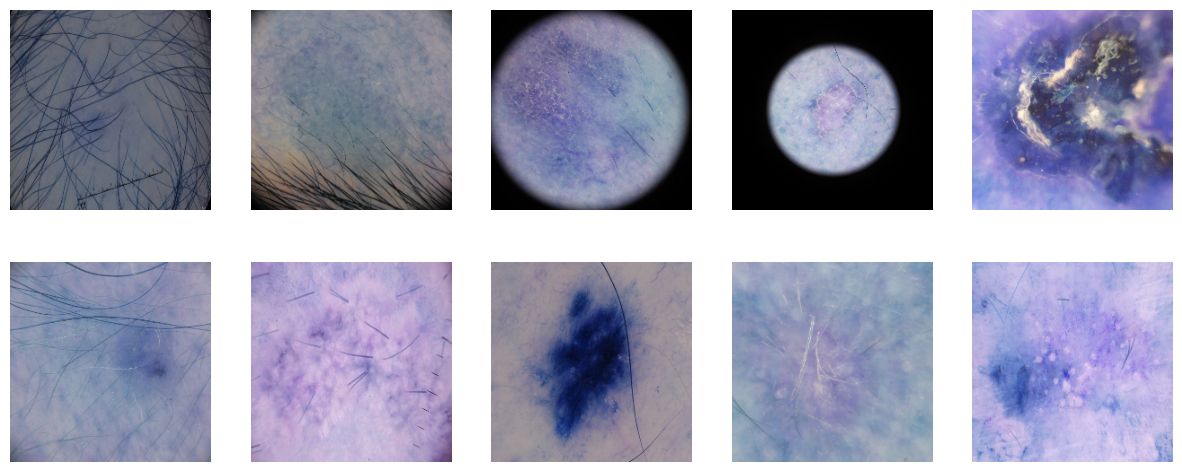

In [27]:
# show 10 images in grid
fig, ax = plt.subplots(2,5, figsize=(15,6))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j])
        ax[i,j].axis('off')
plt.show()



In [28]:
images.shape

(1280, 224, 224, 3)

In [29]:
# Save the NumPy array to a file
np.save('x_train.npy', images)
np.save('y_train.npy',y_train)


In [30]:
images = np.array([cv2.resize(cv2.imread(image_data+file),(224,224))/255 for file in X_test])

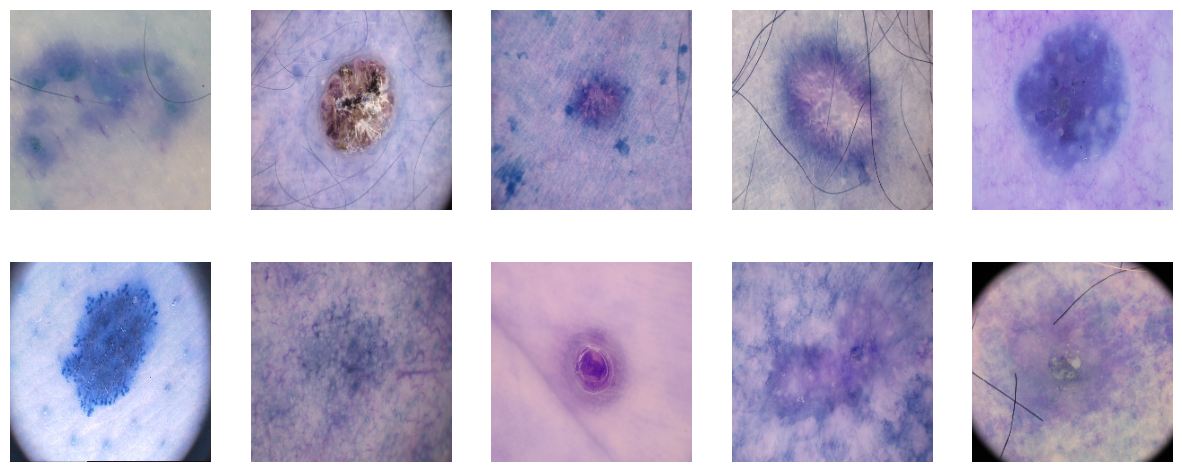

In [31]:
# show 10 images in grid
fig, ax = plt.subplots(2,5, figsize=(15,6))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j])
        ax[i,j].axis('off')
plt.show()



In [32]:
images.shape

(320, 224, 224, 3)

In [33]:
# Save the NumPy array to a file
np.save('x_test.npy', images)
np.save('y_test.npy',y_test)
